In [16]:
# Lab2 Day 2
import pandas as pd
customers = pd.read_csv('marketing_customer_analysis.csv')

In [17]:
display(customers)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [18]:
customers.shape

(10910, 26)

In [19]:
# Standardize Header Names. What? 
# cols = []
cols = []
for i in range(len(customers.columns)):
    cols.append(customers.columns[i].lower())
customers.columns=cols

In [20]:
customers.columns = customers.columns.str.replace(' ', '_')
# Replacing spaces with underscores

In [21]:
# Removing column 'unnamed:_0'   data = data.drop(['tcode','percent_income_donated','very_generous'], axis=1)
customers = customers.drop(('unnamed:_0'), axis=1)

In [22]:
customers.dtypes
# Total Claim Amount  , Number of Open Complaints, Months Since Last Claim , Customer Lifetime Value   are numerical
# The rest ist categorical

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [23]:
# NaN Values donors.isna().sum()
customers.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [33]:
# Percentages of NaN
# nulls_df = pd.DataFrame(round(donors.isna().sum()/len(donors),4)*100)
#nulls_df
#nulls_df = nulls_df.reset_index()
#nulls_df
#nulls_df.columns = ['header_name', 'percent_nulls']
#nulls_df
round(customers.isna().sum()/len(customers),4)*100

nulls_customers = pd.DataFrame(round(customers.isna().sum()/len(customers),4)*100)
nulls_customers
nulls_customers = nulls_customers.reset_index()
nulls_customers
nulls_customers.columns = ['header_name', 'percent_nulls']
nulls_customers

,header_name,percent_nulls
0,customer,0.00
1,state,5.78
2,customer_lifetime_value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective_to_date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [39]:
#Replacing Nan's for months since last claim: Use the most frequent number
import numpy as np
months_since_last_claim = customers['months_since_last_claim'].mean()
months_since_last_claim
customers['months_since_last_claim'] = customers['months_since_last_claim'].fillna(months_since_last_claim)

In [40]:
# Use most common value to fill NaN's for categorial columns: vehicle_class , vehicle_size , respone and state
customers['state'].value_counts()
#donors['gender'].value_counts()
#customers['state'] = customers['state'].fillna

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [41]:
customers['state'] = customers['state'].fillna('California')

In [42]:
customers['vehicle_class'].value_counts()

Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: vehicle_class, dtype: int64

In [43]:
customers['vehicle_class'] = customers['vehicle_class'].fillna('Four-Door Car')

In [46]:
customers['vehicle_size'].value_counts()

Medsize    7251
Small      1966
Large      1071
Name: vehicle_size, dtype: int64

In [47]:
customers['vehicle_size'] = customers['vehicle_size'].fillna('Medsize')

In [48]:
customers['response'].value_counts()

No     8813
Yes    1466
Name: response, dtype: int64

In [49]:
customers['respone'] = customers['response'].fillna('No')

In [ ]:
# Column vehicle_type has 50.25% of NaN's or more specifically misssing values which makes it not fit for use.
# It cannot produce reliable data or conclusion. In a real world case I would suggest to drop the column. 
# I will not do this here though, just to keep the data just in case for the future.

In [55]:
display(customers)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,respone,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,No,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,No,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,No,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,Yes,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,No,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,No,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,No,2
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,No,2


In [54]:
customers['month'] = pd.DatetimeIndex(customers['effective_to_date']).month
# Source: https://www.codegrepper.com/code-examples/python/extract+month+from+datetime+pandas

In [56]:
customers.head(60)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,respone,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,No,2
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,No,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,No,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,Yes,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,No,1
5,HO81102,California,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,50549,...,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,No,2
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN,No,2
7,IH64929,California,4956.247235,No,Basic,High School or Below,2/24/11,Employed,M,87197,...,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN,No,2
8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,66839,...,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN,Yes,1
9,QX31376,Oregon,17114.328150,No,Extended,Master,1/4/11,Employed,F,70961,...,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN,No,1


In [62]:
# There seems to be no March data as well as any other months except January and February.
# So the whole DataFrame shows only data for the first quarter? Not sure though.
customers['month'].where(customers['month'] == 2)

0        2.0
1        NaN
2        2.0
3        NaN
4        NaN
        ... 
10905    NaN
10906    NaN
10907    2.0
10908    2.0
10909    NaN
Name: month, Length: 10910, dtype: float64

In [63]:
customers.to_csv('marketing_customer_analysis_filtered.csv')

In [1]:
# LAB 3

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

In [3]:
marketing = pd.read_csv('marketing_customer_analysis.csv')

In [10]:
# Showing Data Frame Info
marketing.shape

(9134, 24)

In [11]:
display(marketing)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [20]:
marketing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer,9134,9134,DK98861,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,9134.0,NaN,NaN,NaN,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
Response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,9134.0,NaN,NaN,NaN,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


In [29]:
# Show a plot of the total number of responses.
# sns.barplot(x="gender", y="median_home_val", data=data)
marketing['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

<AxesSubplot:>

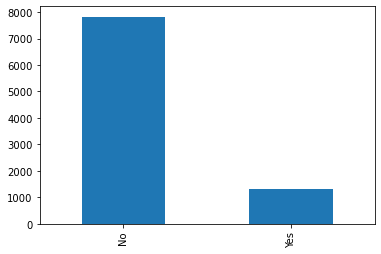

In [30]:
marketing['Response'].value_counts().plot(kind='bar')
# https://stackoverflow.com/questions/57967761/how-to-sum-up-yes-and-no-into-a-total-quantity-using-matplotlib-pandas-python

In [89]:
marketing['Sales Channel'].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [60]:
marketing[marketing['Sales Channel']=='Agent']
agent_total = marketing[marketing['Sales Channel']=='Agent']
len(agent_total)

3477

In [58]:
# Response rate. Positive respone rate would be Number of 'Yes' / Total Responses
# data[(data['target_d']==100) & (data['very_generous']) ]
marketing[(marketing['Response']=='Yes') & (marketing['Sales Channel']== 'Agent')]
agent_yes = marketing[(marketing['Response']=='Yes') & (marketing['Sales Channel']== 'Agent')]
len(agent_yes)

666

In [77]:
responserate_agent = len(agent_yes)/len(agent_total)
round(responserate_agent, 4)

0.1915

In [76]:
# Now for Call Center
marketing[marketing['Sales Channel']=='Call Center']
call_total = marketing[marketing['Sales Channel']=='Call Center']
len(call_total)
marketing[(marketing['Response']=='Yes') & (marketing['Sales Channel']== 'Call Center')]
call_yes = marketing[(marketing['Response']=='Yes') & (marketing['Sales Channel']== 'Call Center')]
len(call_yes)
responserate_call = len(call_yes)/len(call_total)
round(responserate_call, 4)

0.1088

In [74]:
# Now for Web
marketing[marketing['Sales Channel']=='Web']
web_total = marketing[marketing['Sales Channel']=='Web']
len(web_total)
marketing[(marketing['Response']=='Yes') & (marketing['Sales Channel']== 'Web')]
web_yes = marketing[(marketing['Response']=='Yes') & (marketing['Sales Channel']== 'Web')]
len(web_yes)
responserate_web = len(web_yes)/len(web_total)
round(responserate_web, 4)

0.1177

In [75]:
# Now for Branch
marketing[marketing['Sales Channel']=='Branch']
branch_total = marketing[marketing['Sales Channel']=='Branch']
len(branch_total)
marketing[(marketing['Response']=='Yes') & (marketing['Sales Channel']== 'Branch')]
branch_yes = marketing[(marketing['Response']=='Yes') & (marketing['Sales Channel']== 'Branch')]
len(branch_yes)
responserate_branch = len(branch_yes)/len(branch_total)
round(responserate_branch, 4)

0.1145

In [79]:
resp_sales = {'Agent': 0.1915, 'Call Center' : 0.1088, 'Web': 0.1177, 'Branch' : 0.1145}
print(resp_sales)

{'Agent': 0.1915, 'Call Center': 0.1088, 'Web': 0.1177, 'Branch': 0.1145}


In [83]:
# print(pd.DataFrame(list(fruit_dict.items()),columns=['Quantity', 'FruitName']))
pd.DataFrame(list(resp_sales.items()),columns=['sales channel', 'responsrate'])
resprate_sales = pd.DataFrame(list(resp_sales.items()),columns=['sales channel', 'responsrate'])
display(resprate_sales)

,sales channel,responsrate
0,Agent,0.1915
1,Call Center,0.1088
2,Web,0.1177
3,Branch,0.1145


<AxesSubplot:xlabel='sales channel', ylabel='responsrate'>

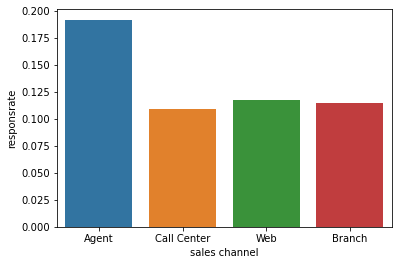

In [88]:
# Barplot
sns.barplot(x='sales channel' , y='responsrate', data=resprate_sales)

In [44]:
# Response rate general
response_p= marketing[marketing['Response']=='Yes']
len(response_p)
response_t = marketing['Response']
len(response_t)
responserate = len(response_p)/len(response_t)
print(responserate)

<AxesSubplot:xlabel='Response', ylabel='Total Claim Amount'>

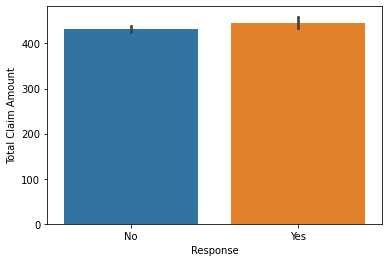

In [90]:
# Response rate by Total Claim Amount
# sns.barplot(x="gender", y="median_home_val", data=data)
sns.barplot(x='Response', y='Total Claim Amount', data=marketing)

<AxesSubplot:xlabel='Response', ylabel='Income'>

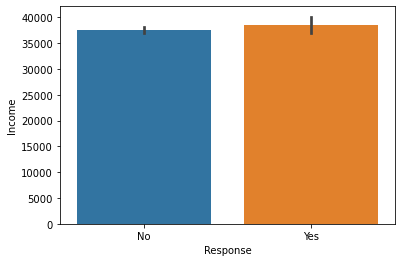

In [91]:
# Response rate by Income
sns.barplot(x='Response', y='Income', data=marketing)